In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load all 8 datasets
data_dir = 'data/new_data'
datasets = {}

for i in range(1, 9):
    filepath = os.path.join(data_dir, f'preprocessed_data_cluster_{i}.csv')
    datasets[i] = pd.read_csv(filepath)
    print(f"Cluster {i}: {len(datasets[i])} rows")

Cluster 1: 397 rows
Cluster 2: 558 rows
Cluster 3: 959 rows
Cluster 4: 336 rows
Cluster 5: 554 rows
Cluster 6: 611 rows
Cluster 7: 534 rows
Cluster 8: 496 rows


In [2]:
# Sort by time and assign new time values in 5-min (300 sec) increments
for cluster_id, df in datasets.items():
    df_sorted = df.sort_values('start_time').reset_index(drop=True)
    df_sorted['time_idx'] = df_sorted.index * 300  # 0, 300, 600, ...
    datasets[cluster_id] = df_sorted

print("Time values reassigned to 5-min increments (0, 300, 600, ...)")

Time values reassigned to 5-min increments (0, 300, 600, ...)


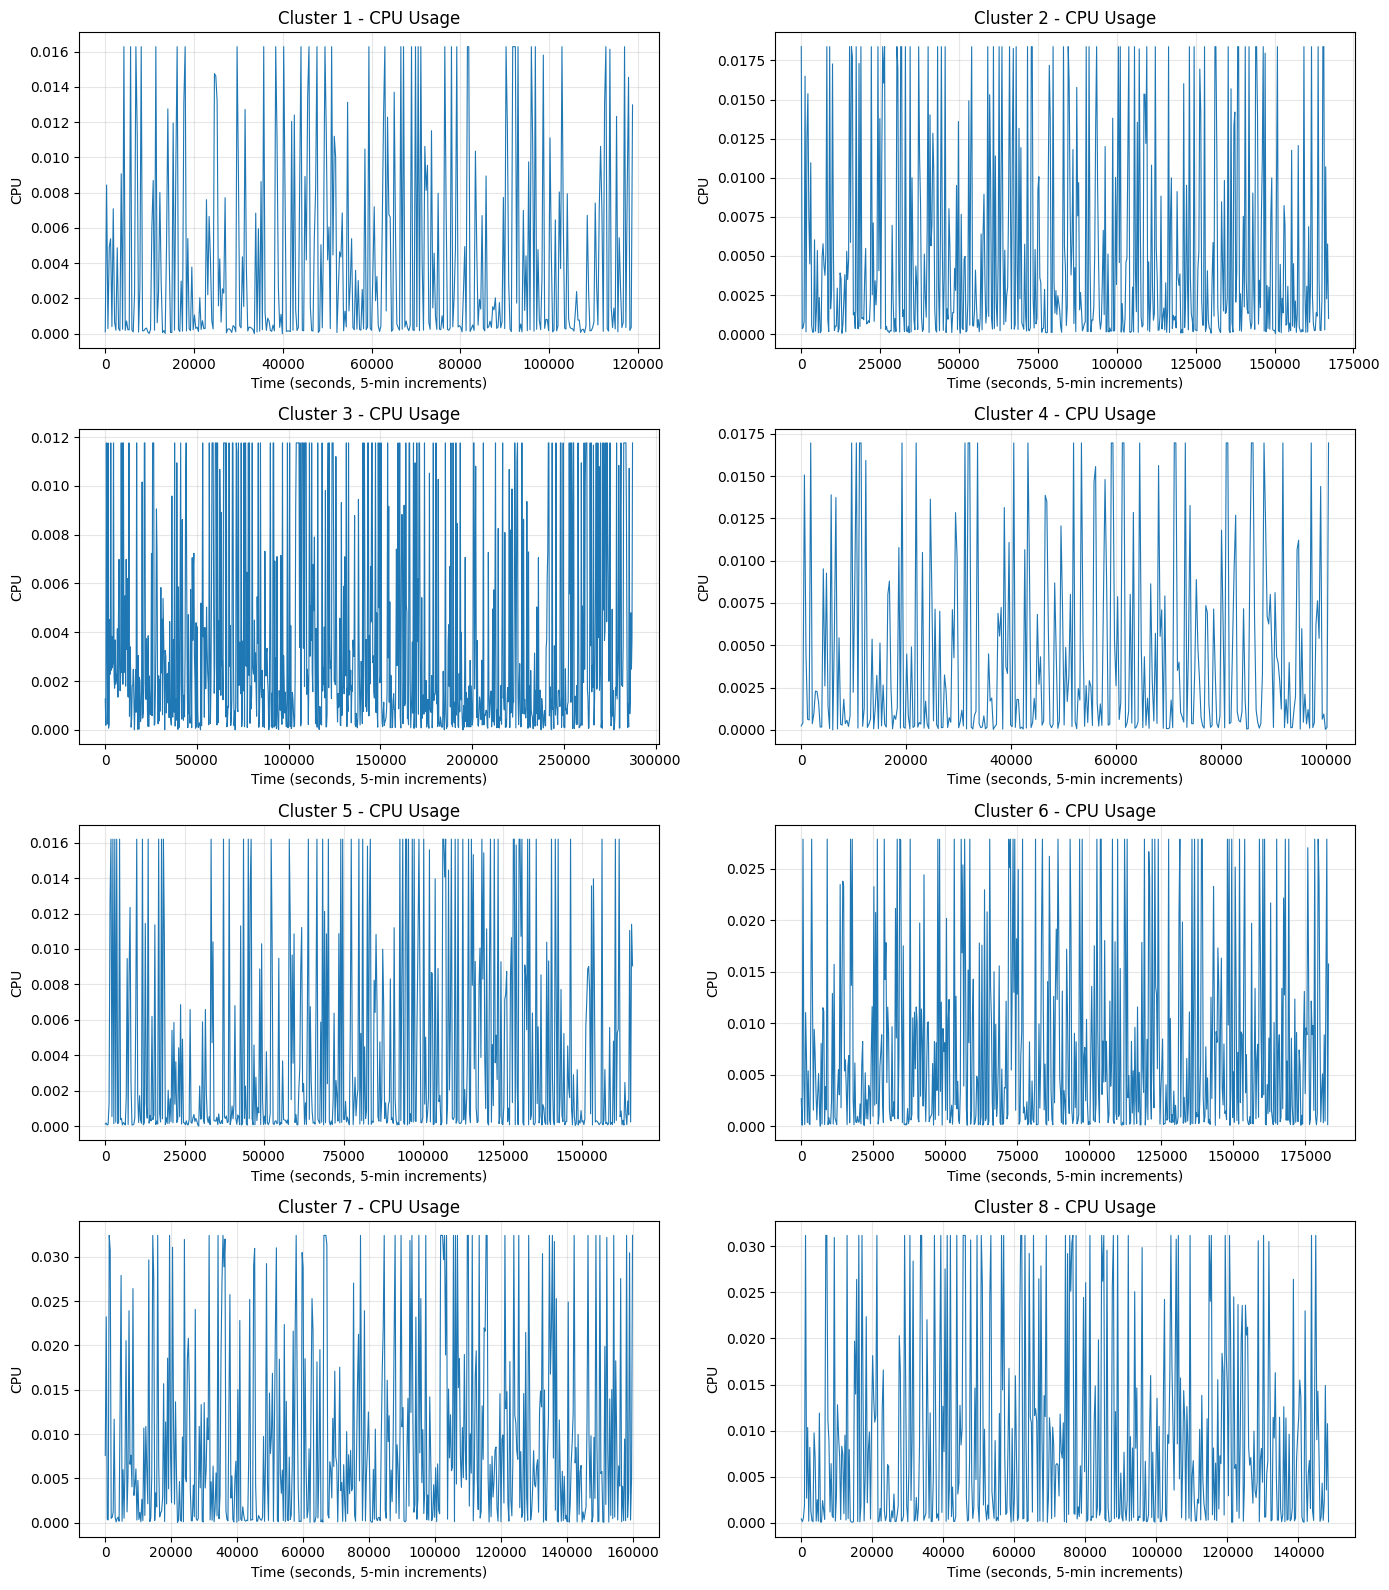

In [3]:
# Plot CPU usage over time for all clusters (5-min increments)
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, (cluster_id, df) in enumerate(datasets.items()):
    ax = axes[i]
    ax.plot(df['time_idx'], df['cpu'], linewidth=0.8)
    ax.set_title(f'Cluster {cluster_id} - CPU Usage')
    ax.set_xlabel('Time (seconds, 5-min increments)')
    ax.set_ylabel('CPU')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [4]:
# Apply smoothing using rolling average (window=5)
window_size = 5

for cluster_id, df in datasets.items():
    df['cpu_smooth'] = df['cpu'].rolling(window=window_size, center=True, min_periods=1).mean()
    df['memory_smooth'] = df['memory'].rolling(window=window_size, center=True, min_periods=1).mean()
    datasets[cluster_id] = df

print(f"Applied rolling average smoothing with window size {window_size}")

Applied rolling average smoothing with window size 5


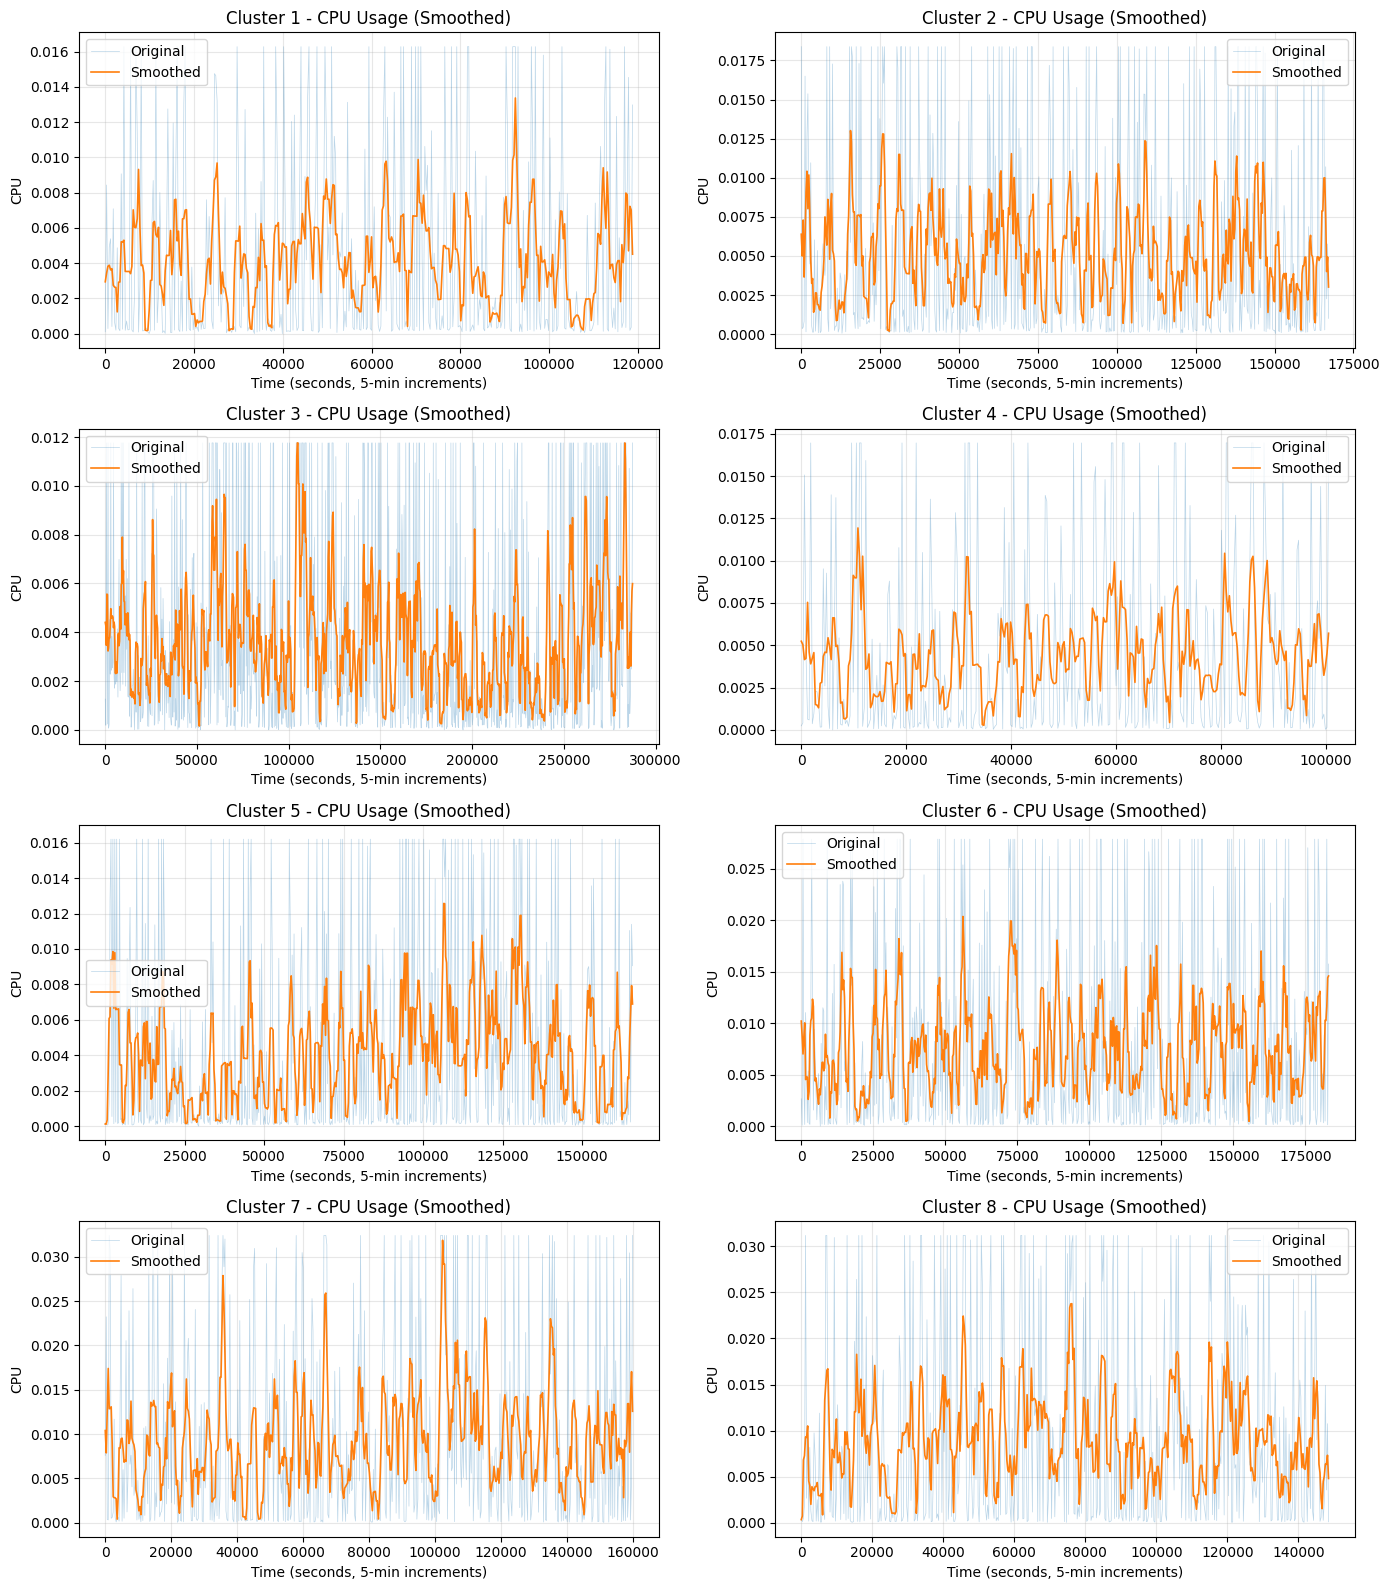

In [5]:
# Plot smoothed CPU usage over time for all clusters
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, (cluster_id, df) in enumerate(datasets.items()):
    ax = axes[i]
    ax.plot(df['time_idx'], df['cpu'], linewidth=0.5, alpha=0.3, label='Original')
    ax.plot(df['time_idx'], df['cpu_smooth'], linewidth=1.2, label='Smoothed')
    ax.set_title(f'Cluster {cluster_id} - CPU Usage (Smoothed)')
    ax.set_xlabel('Time (seconds, 5-min increments)')
    ax.set_ylabel('CPU')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

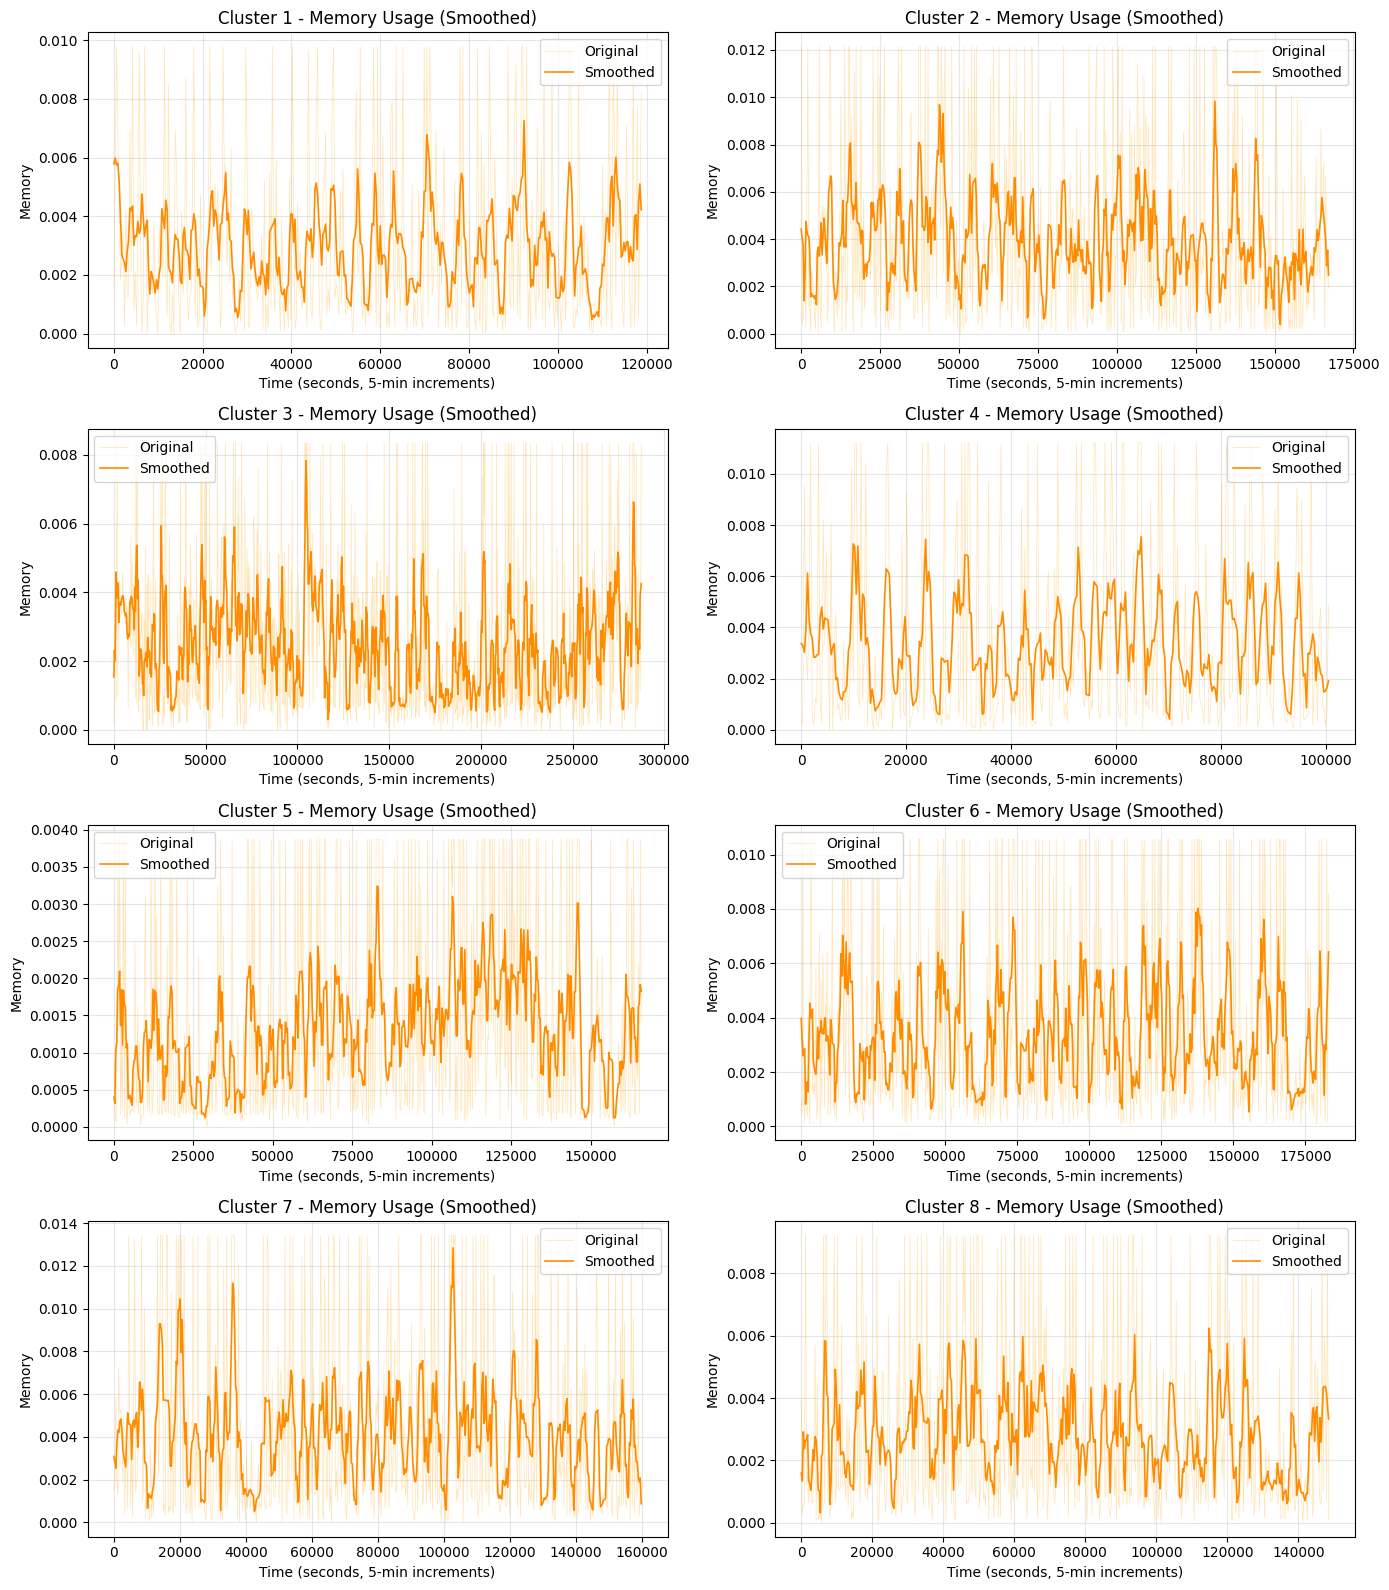

In [6]:
# Plot smoothed Memory usage over time for all clusters
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, (cluster_id, df) in enumerate(datasets.items()):
    ax = axes[i]
    ax.plot(df['time_idx'], df['memory'], linewidth=0.5, alpha=0.3, color='orange', label='Original')
    ax.plot(df['time_idx'], df['memory_smooth'], linewidth=1.2, color='darkorange', label='Smoothed')
    ax.set_title(f'Cluster {cluster_id} - Memory Usage (Smoothed)')
    ax.set_xlabel('Time (seconds, 5-min increments)')
    ax.set_ylabel('Memory')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
# Export smoothed data to CSVs for training
output_dir = 'data/smoothed'
os.makedirs(output_dir, exist_ok=True)

for cluster_id, df in datasets.items():
    # Keep only the columns needed for training
    export_df = df[['cluster', 'time_idx', 'cpu_smooth', 'memory_smooth']].copy()
    export_df.columns = ['cluster', 'time', 'cpu', 'memory']
    
    filepath = os.path.join(output_dir, f'smoothed_cluster_{cluster_id}.csv')
    export_df.to_csv(filepath, index=False)
    print(f"Exported cluster {cluster_id} to {filepath}")

print(f"\nAll smoothed datasets exported to {output_dir}/")

Exported cluster 1 to data/smoothed\smoothed_cluster_1.csv
Exported cluster 2 to data/smoothed\smoothed_cluster_2.csv
Exported cluster 3 to data/smoothed\smoothed_cluster_3.csv
Exported cluster 4 to data/smoothed\smoothed_cluster_4.csv
Exported cluster 5 to data/smoothed\smoothed_cluster_5.csv
Exported cluster 6 to data/smoothed\smoothed_cluster_6.csv
Exported cluster 7 to data/smoothed\smoothed_cluster_7.csv
Exported cluster 8 to data/smoothed\smoothed_cluster_8.csv

All smoothed datasets exported to data/smoothed/
